In [2]:
from eworm.utils import *
from eworm.network.detailed_circuit import Cell
import numpy as np
import matplotlib.pyplot as plt
import pickle
from neuron import h, load_mechanisms
import colorsys
import os

h.load_file('stdrun.hoc')
this_file_path = os.path.dirname('__file__')

/home/zhaomengdi/anaconda3/envs/eworm/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
--No graphics will be displayed.


In [3]:
electrophysiology_simulation_config = {
    "AWAL":{
        "expr_ori_file_name":"AWAL_Current_Clamp_Trace.txt",
        "expr_file_name":"AWAL_electrophysiology_trace.pkl",
        "expr_x_range":[42, 17491],
        "expr_y_range":[],
        "siml_file_name":"AWAL_simulation_trace.pkl",
        "siml_x_range":[50100, 84998],
        "unit":1e3,
        "xlim":(0,7),
        "ylim":(),
        "mechanism_dir": os.path.join(this_file_path, '..', 'components', 'mechanism_AWA'),
        "sim_config": {"dt": 0.2, "tstop": 20000, "v_init": -73, "secondorder": 0},
        "stim_config": {"type":'iclamp', "clamp_range":np.arange(-2,17,2) * 1e-3,"delay":11000, "dur":5000}
        },
    "AWCL":{
        "expr_ori_file_name":"AWCL_Voltage_Clamp_Trace.txt",
        "expr_file_name":"AWCL_electrophysiology_trace.pkl",
        "expr_x_range":[21, 332],
        "expr_y_range":[],
        "siml_file_name":"AWCL_simulation_trace.pkl",
        "siml_x_range":[4942, 5564],
        "unit":1e9,
        "xlim":(0,0.12),
        "ylim":(-0.50, 0.75),
        "mechanism_dir": os.path.join(this_file_path, '..','components', 'mechanism'),
        "sim_config": {"dt": 0.2, "tstop": 1600, "v_init": -60, "secondorder": 0},
        "stim_config": {"type":'seclamp', "clamp_range":np.arange(-10,111,20), "delay":1000, "dur":100}
        },
    "AIYL":{
        "expr_ori_file_name":"AIYL_Current_Clamp_Trace.txt",
        "expr_file_name":"AIYL_electrophysiology_trace.pkl",
        "expr_x_range":[42, 17491],
        "expr_y_range":[],
        "siml_file_name":"AIYL_simulation_trace.pkl",
        "siml_x_range":[50100, 84998],
        "unit":1e3,
        "xlim":(0,7),
        "ylim":(),
        "mechanism_dir": os.path.join(this_file_path, '..', 'components', 'mechanism'),
        "sim_config": {"dt": 0.2, "tstop": 20000, "v_init": -45, "secondorder": 0},
        "stim_config": {"type":'iclamp', "clamp_range":np.arange(-15,36,5) * 1e-3,"delay":11000, "dur":5000}
        },
    "RIML":{
        "expr_ori_file_name":"RIML_Current_Clamp_Trace.txt",
        "expr_file_name":"RIML_electrophysiology_trace.pkl",
        "expr_x_range":[42, 17491],
        "expr_y_range":[1,10],
        "siml_file_name":"RIML_simulation_trace.pkl",
        "siml_x_range":[50100, 84998],
        "unit":1e3,
        "xlim":(0,7),
        "ylim":(),
        "mechanism_dir": os.path.join(this_file_path, '..', 'components', 'mechanism'),
        "sim_config": {"dt": 0.2, "tstop": 20000, "v_init": -39.3, "secondorder": 0},
        "stim_config": {"type":'iclamp', "clamp_range":np.arange(-15,26,5) * 1e-3,"delay":11000, "dur":5000}
        },
    "VD05":{
        "expr_ori_file_name":"VD05_Voltage_Clamp_Trace.txt",
        "expr_file_name":"VD05_electrophysiology_trace.pkl",
        "expr_x_range":[127, 3527],
        "expr_y_range":[],
        "siml_file_name":"VD05_simulation_trace.pkl",
        "siml_x_range":[4500, 11300],
        "unit":1e9,
        "xlim":(0,1.4),
        "ylim":(-0.05, 0.3),
        "mechanism_dir": os.path.join(this_file_path, '..', 'components', 'mechanism'),
        "sim_config": {"dt": 0.2, "tstop": 2600, "v_init": -60, "secondorder": 0},
        "stim_config": {"type":'seclamp', "clamp_range":np.arange(-10,41,10), "delay":1000, "dur":1210}
        },
    "AVAL":{
        "expr_ori_file_name":"AVAL_Current_Clamp_Trace.txt",
        "expr_file_name":"AVAL_electrophysiology_trace.pkl",
        "expr_x_range":[42, 17491],
        "expr_y_range":[],
        "siml_file_name":"AVAL_simulation_trace.pkl",
        "siml_x_range":[50060, 84958],
        "unit":1e3,
        "xlim":(0,6.5),
        "ylim":(),
        "mechanism_dir": os.path.join(this_file_path, '..', 'components', 'mechanism'),
        "sim_config": {"dt": 0.2, "tstop": 20000, "v_init": -30, "secondorder": 0},
        "stim_config": {"type":'iclamp', "clamp_range":np.arange(-20,21,5) * 1e-3,"delay":11000, "dur":5015}  # (nA)
        }
}

In [4]:
def transfer_electrophysiology_data(config, neuron_name):
    """Transfer electrophysiology data from .txt to .pkl"""
    with open(os.path.join(this_file_path, "single_neuron", "electrophysiology_data",
                           config["expr_ori_file_name"]), "r") as f:
        str = f.read()
    stri = str.split('\n')
    nrow = len(stri)
    ncol = len(stri[0].split("\t"))
    patch_data = np.zeros((nrow-4, ncol), dtype=float)
    for i in range(3, nrow):
        if len(stri[i].strip()) <= 0:
            continue
        strin = stri[i].strip().split("\t")
        for j in range(ncol):
            patch_data[i-3,j] = float(strin[j])
    patch_data = np.transpose(patch_data)
    x_start, x_end = config["expr_x_range"]
    if len(config["expr_y_range"]):
        y_start, y_end = config["expr_y_range"]
    else:
        y_start, y_end = 1, len(patch_data[0])
    voltage = patch_data[y_start:y_end, x_start:x_end]*config["unit"]
    time = patch_data[0, x_start:x_end] - patch_data[0, x_start]

    fig_size=(4,3)
    fig = plt.figure(figsize=fig_size)
    for i, trace in enumerate(voltage):
        plt.plot(time, voltage[i], alpha = 1,color = 'red')
        plt.title(neuron_name)

    pickle.dump({"voltage": voltage.tolist(),  # (mV)
                 "time": time.tolist()},  # s
                open(os.path.join(this_file_path, "single_neuron", "electrophysiology_data",
                                  config["expr_file_name"]), "wb"))

In [5]:
def make_simulation_data(config, neuron_name):
    """simulate single neuron"""
    load_mechanisms(config["mechanism_dir"])
    model_dir = os.path.join(this_file_path, '..', 'components', 'model', f"{neuron_name}.hoc").replace("\\", "\/")
    h.load_file(model_dir)
    cell_param = func.load_json(os.path.join(this_file_path, "..", "components", "param", "cell", f'{neuron_name}.json'))
    cell_list = func.load_json(os.path.join(this_file_path, "..", "network", "config.json"))['cell_info']['cells_name_dic']
    cell_list_index = list(cell_list.values()).index(neuron_name)
    cell_index = list(cell_list.keys())[cell_list_index]
    neuron = Cell(index = cell_index, name = neuron_name, cell_param=cell_param, rec_voltage=True)
    neuron_soma = neuron.hoc_obj.Soma(0.5)

    h.dt = config["sim_config"]['dt']
    h.steps_per_ms=int(1/h.dt)
    h.tstop = config["sim_config"]['tstop']
    h.secondorder = config["sim_config"]['secondorder']
    h.finitialize(config["sim_config"]['v_init'])
    h.v_init=config["sim_config"]['v_init']

    dynamic_trace = np.zeros((len(config["stim_config"]['clamp_range']), int(h.tstop/h.dt+1)), dtype=np.float16)
    stim_trace = np.zeros((len(config["stim_config"]['clamp_range']), int(h.tstop/h.dt+1)), dtype=np.float16)
    time_trace = np.zeros((len(config["stim_config"]['clamp_range']), int(h.tstop/h.dt+1)), dtype=np.float16)

    if config["stim_config"]['type'] == 'iclamp':
        stim = h.IClamp(neuron_soma)
        stim.delay = config["stim_config"]['delay']
        stim.dur = config["stim_config"]['dur']
        for i, amp in enumerate(config["stim_config"]['clamp_range']):
            print(i)
            stim.amp = amp
            record_stim = h.Vector().record(stim._ref_i)
            record_t = h.Vector().record(h._ref_t)
            record_v = h.Vector().record(neuron.hoc_obj.Soma(0.5)._ref_v)
            h.dt = config["sim_config"]['dt']
            h.run()
            dynamic_trace[i,:] = record_v.as_numpy()
            stim_trace[i,:] = record_stim.as_numpy() * 1e3
            time_trace[i,:] = record_t.as_numpy()

    elif config["stim_config"]['type'] == 'seclamp':
        stim = h.SEClamp(neuron_soma)
        stim.dur1 = config["stim_config"]['delay']
        stim.dur2 = config["stim_config"]['dur']
        stim.dur3 = config["sim_config"]['tstop'] - stim.dur1 - stim.dur2
        stim.amp1 = config["sim_config"]['v_init']
        stim.amp3 = stim.amp1
        stim.rs = 29 # (MOhm)
        for i, amp in enumerate(config["stim_config"]['clamp_range']):
            print(i)
            stim.amp2 = amp
            record_i = h.Vector().record(stim._ref_i)
            record_t = h.Vector().record(h._ref_t)
            record_icap = h.Vector().record(neuron.hoc_obj.Soma(0.5)._ref_i_cap)
            h.run()
            dynamic_trace[i,:] = record_i.as_numpy() - record_icap.as_numpy()
            stim_trace[i,:int(stim.dur1/h.dt+1)] = stim.amp1
            stim_trace[i,int(stim.dur1/h.dt+1):int(stim.dur1/h.dt+stim.dur2/h.dt+1)] = stim.amp2
            stim_trace[i,int(stim.dur1/h.dt+stim.dur2/h.dt+1):] = stim.amp3
            time_trace[i,:] = record_t.as_numpy()

    fig_size=(4,3)
    fig = plt.figure(figsize=fig_size)
    x_start, x_end = config["siml_x_range"]
    dynamic_trace = dynamic_trace[:, x_start: x_end]
    stim_trace = stim_trace[:, x_start: x_end]
    time_trace = (time_trace[:, x_start: x_end] - np.expand_dims(time_trace[:, x_start], axis=-1)) * 1e-3
    for i, trace in enumerate(dynamic_trace):
        plt.plot(np.arange(len(trace)), trace, alpha = 1,color = 'red')
        plt.title(neuron_name)
    pickle.dump({"voltage": dynamic_trace,  # mV
                 "stim": stim_trace,        # pA
                 "time": time_trace},       # s
                open(os.path.join(this_file_path, "single_neuron", "simulation_data",
                                  config["siml_file_name"]), "wb"))

In [37]:
def plot_fitting_result(config, neuron_name):
    """plot electrophysiology data and simulation data in one figure"""
    sim_data = pickle.load(open(os.path.join(this_file_path, "single_neuron", "simulation_data", config["siml_file_name"]), "rb"))
    elec_data = pickle.load(open(os.path.join(this_file_path, "single_neuron", "electrophysiology_data", config["expr_file_name"]), "rb"))
    fig = plt.figure(figsize=(8,2), dpi=200)
    ax = fig.add_subplot(1,2,1)
    for i in range(0, len(elec_data["voltage"])):
        if config["stim_config"]['type'] == 'seclamp':
            plt.plot(elec_data["time"], np.array(elec_data["voltage"])[i]*1000, c=[0.6,0.6,0.6])
        else:
            plt.plot(elec_data["time"], np.array(elec_data["voltage"])[i], c=[0.6,0.6,0.6])
    # num_trace = len(sim_data["voltage"]) + 2
    hue = 0.5682
    sat_max = 0.8278
    sat_min = 0.2
    lit = 0.7059
    sat_list = np.linspace(sat_min,sat_max, len(sim_data["voltage"]))
    for i in range(len(sim_data["voltage"])):
        # cl = ((num_trace-i-2)/num_trace, (num_trace-i-2)/num_trace, 1)
        sat = sat_list[i]
        color_rgb = colorsys.hsv_to_rgb(hue,sat,lit)
        if config["stim_config"]['type'] == 'seclamp':
            plt.plot(np.array(sim_data["time"])[i,:], np.array(sim_data["voltage"])[i,:]*1000, color=color_rgb)
        else:
            plt.plot(np.array(sim_data["time"])[i,:], np.array(sim_data["voltage"])[i,:], color=color_rgb)
    plt.xlim(config["xlim"])
    plt.xlabel("Time (s)")
    if config["stim_config"]['type'] == 'iclamp':
        plt.ylabel("Voltage (mV)")
        plt.xlim(0,6.5)
        plt.ylim(-130, 60)
    elif config["stim_config"]['type'] == 'seclamp':
        plt.ylabel("Current (pA)")
        if len(config["ylim"]):
            plt.ylim(config["ylim"][0]*1000, config["ylim"][1]*1000)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # plt.title(neuron_name)

    plt.subplot(1,6,6)
    for i in range(len(sim_data["stim"])):
        # cl = ((num_trace-i-2)/num_trace, (num_trace-i-2)/num_trace, 1)
        sat = sat_list[i]
        color_rgb = colorsys.hsv_to_rgb(hue,sat,lit)
        plt.plot(np.array(sim_data["time"])[i,:], np.array(sim_data["stim"])[i,:], color=color_rgb)
    plt.xlim(config["xlim"])
    fig.tight_layout()
    # plt.savefig(os.path.join(this_file_path, "single_neuron", "figure", f"{neuron_name}_elec_fit_with_axis.png"))
    if config["stim_config"]['type'] == 'iclamp':
        plt.ylabel("Current (pA)")
    elif config["stim_config"]['type'] == 'seclamp':
        plt.ylabel("Voltage (mV)")
    plt.axis('off')
    plt.savefig(os.path.join(this_file_path, "single_neuron", "figure", f"{neuron_name}_elec_fit_without_axis.png"))
    

In [38]:
def plot_i_v_curve(config, neuron_name):
    """plot iv curve of electrophysiology data and simulation data"""
    sim_data = pickle.load(open(os.path.join(this_file_path, "single_neuron", "simulation_data", config["siml_file_name"]), "rb"))
    elec_data = pickle.load(open(os.path.join(this_file_path, "single_neuron", "electrophysiology_data", config["expr_file_name"]), "rb"))
    sim_voltage, sim_len = np.array(sim_data["voltage"]), len(sim_data["voltage"][0])
    elec_data, elec_len = np.array(elec_data["voltage"]), len(elec_data["voltage"][0])
    sim_elec_i = config["stim_config"]["clamp_range"]
    sim_v = np.mean(sim_voltage[:, int(sim_len*4/7):int(sim_len*5.9/7)], axis=-1)
    elec_v = np.mean(elec_data[:, int(elec_len*4/7):int(elec_len*5.9/7)], axis=-1)
    plt.figure(figsize=(2,2), dpi=200)
    if config["stim_config"]['type'] == 'iclamp':
        plt.plot(sim_elec_i*1e3, elec_v, color='r', marker='o', label='experiment')
        plt.plot(sim_elec_i*1e3, sim_v, color='k', marker='*', label='model')
        plt.xlabel("Current (pA)")
        plt.ylabel("Voltage (mV)")
    elif config["stim_config"]['type'] == 'seclamp':
        plt.plot(sim_elec_i, elec_v*1e3, color='r', marker='o', label='experiment')
        plt.plot(sim_elec_i, sim_v*1e3, color='k', marker='*', label='model')
        plt.xlabel("Voltage (mV)")
        plt.ylabel("Current (pA)")
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig(os.path.join(this_file_path, "single_neuron", "figure", f"{neuron_name}_iv_steady_curve.png"))
    # plt.legend()

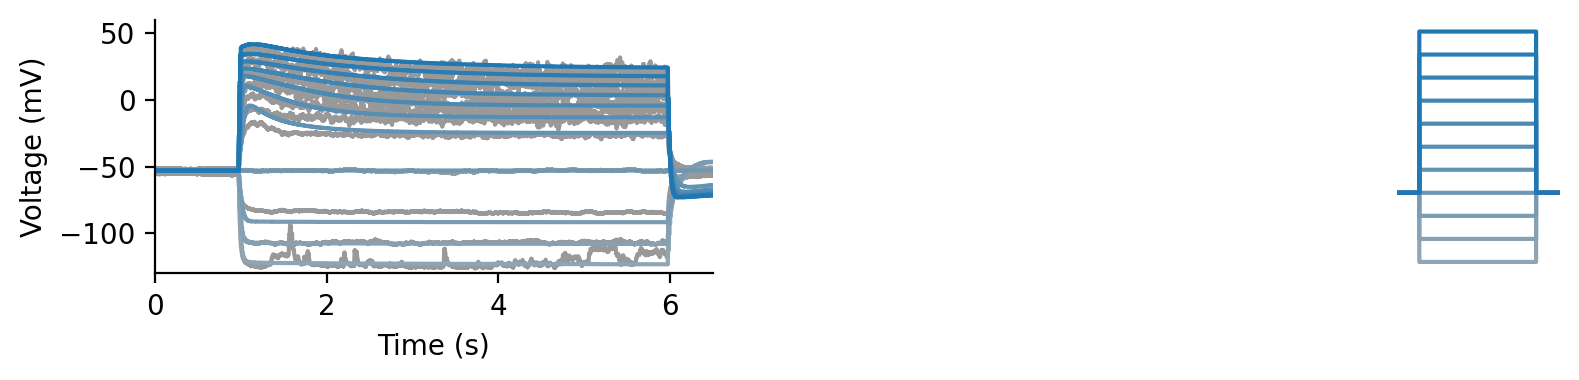

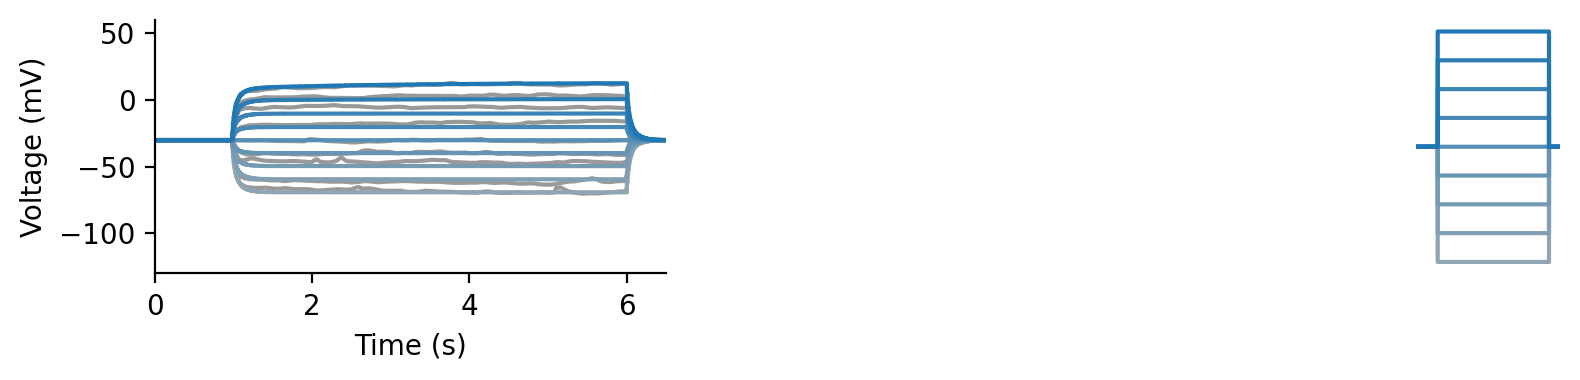

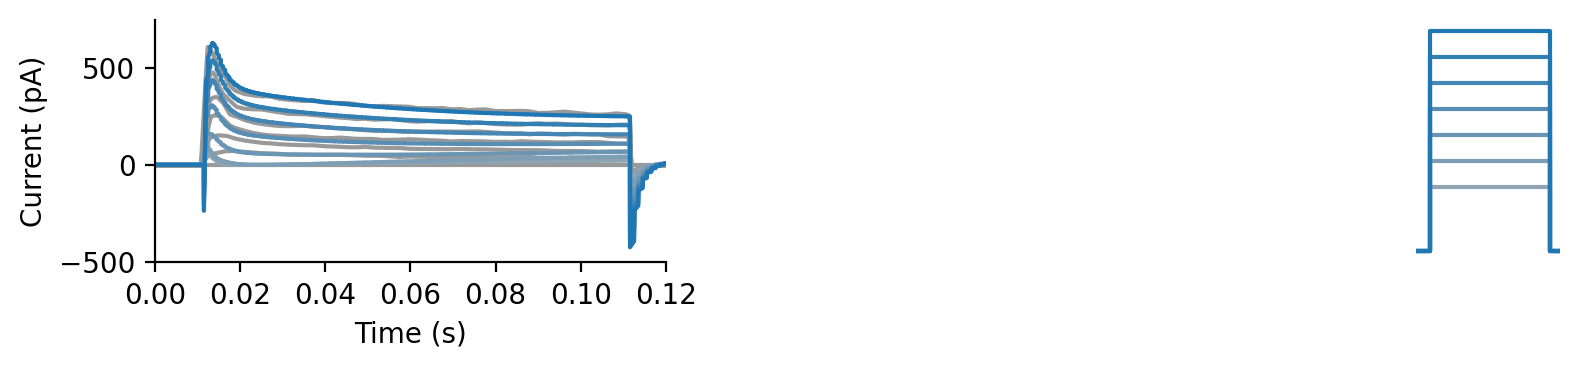

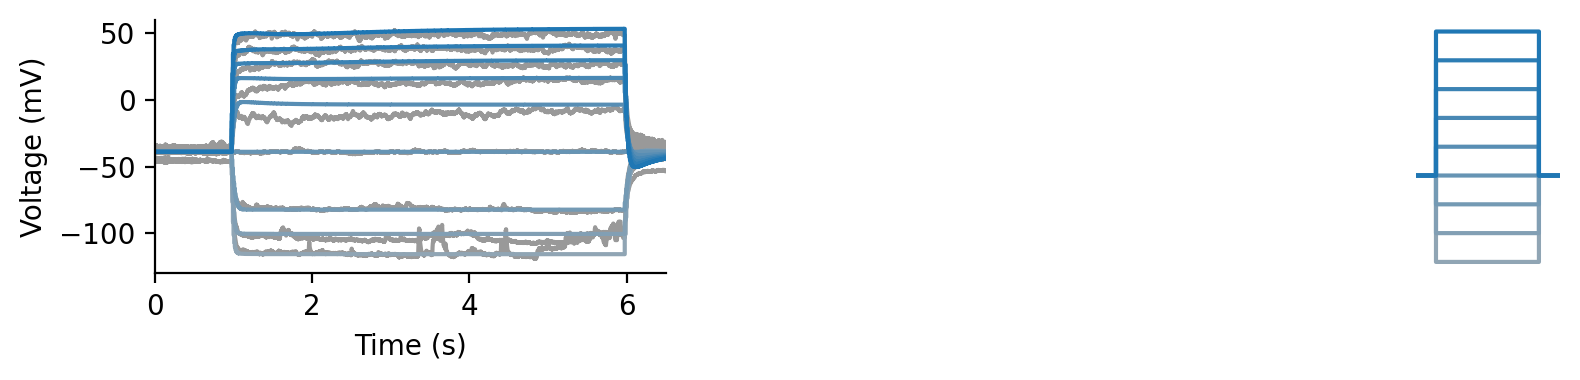

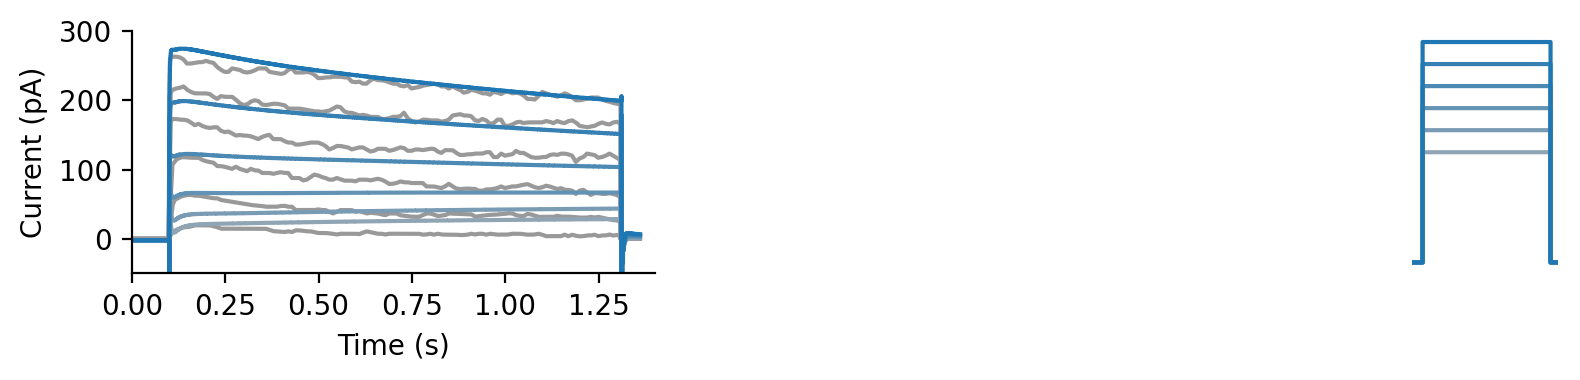

In [39]:
# ["AIYL", "AVAL", "AWCL", "RIML", "VD05"]
# ["AWAL"]
# when change cell, you should restart kernal
neuron_name_list = ["AIYL", "AVAL", "AWCL", "RIML", "VD05"]
for neuron_name in neuron_name_list:
    # transfer_electrophysiology_data(electrophysiology_simulation_config[neuron_name], neuron_name)
    # make_simulation_data(electrophysiology_simulation_config[neuron_name], neuron_name)
    plot_fitting_result(electrophysiology_simulation_config[neuron_name], neuron_name)
    # plot_i_v_curve(electrophysiology_simulation_config[neuron_name], neuron_name)

In [9]:
def make_all_comp_simulation_data(config, neuron_name, amp):
    """simulate single neuron, amp (pA)"""
    load_mechanisms(config["mechanism_dir"])
    model_dir = os.path.join(this_file_path, '..', 'components', 'model', f"{neuron_name}.hoc").replace("\\", "\/")
    h.load_file(model_dir)
    cell_param = func.load_json(os.path.join(this_file_path, "..", "components", "param", "cell", f'{neuron_name}.json'))
    cell_list = func.load_json(os.path.join(this_file_path, "..", "network", "config.json"))['cell_info']['cells_name_dic']
    cell_list_index = list(cell_list.values()).index(neuron_name)
    cell_index = list(cell_list.keys())[cell_list_index]
    neuron = Cell(index = cell_index, name = neuron_name, cell_param=cell_param, rec_voltage=True)
    neuron_soma = neuron.hoc_obj.Soma(0.5)

    h.dt = config["sim_config"]['dt']
    h.steps_per_ms=int(1/h.dt)
    h.tstop = config["sim_config"]['tstop']
    h.secondorder = config["sim_config"]['secondorder']
    h.finitialize(config["sim_config"]['v_init'])
    h.v_init=config["sim_config"]['v_init']

    nseg = len(neuron.segments)
    dynamic_trace = np.zeros((nseg, int(h.tstop/h.dt+1)), dtype=np.float16)

    if config["stim_config"]['type'] == 'iclamp':
        stim = h.IClamp(neuron_soma)
        stim.delay = config["stim_config"]['delay']
        stim.dur = config["stim_config"]['dur']
        stim.amp = amp * 1e-3
        record_stim = h.Vector().record(stim._ref_i)
        record_t = h.Vector().record(h._ref_t)
        record_v = h.Vector().record(neuron.hoc_obj.Soma(0.5)._ref_v)
        h.dt = config["sim_config"]['dt']
        h.run()
        for i, segment in enumerate(neuron.segments):
            dynamic_trace[i,:] = segment.voltage.as_numpy()
        time_trace = record_t.as_numpy()

    fig = plt.figure()
    x_start, x_end = config["siml_x_range"]
    dynamic_trace = dynamic_trace[:, x_start: x_end]
    time_trace = (time_trace[x_start: x_end] - time_trace[x_start]) * 1e-3
    for i, trace in enumerate(dynamic_trace):
        plt.plot(time_trace, trace)
    plt.title(neuron_name)

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.set_ylabel("Time (s)")
    # ax.set_ylim(2, 4)
    xx = np.arange(0,nseg,1)
    yy = time_trace
    X, Y = np.meshgrid(xx, yy)
    Z = np.transpose(dynamic_trace)
    ax.plot_surface(X,Y,Z,cmap='jet')
    ax.view_init(elev=50, azim=13)
    plt.savefig(os.path.join(this_file_path, "single_neuron", "figure", f"{neuron_name}_comp_voltage.png"))

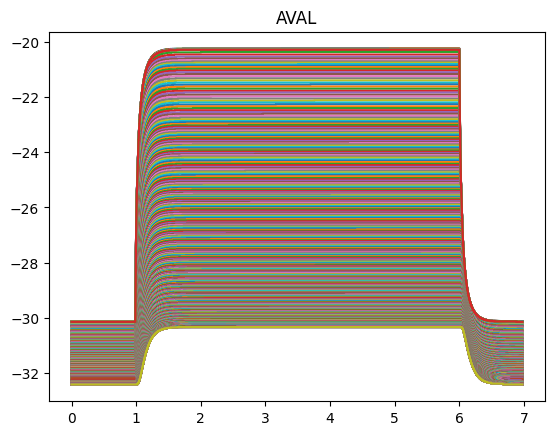

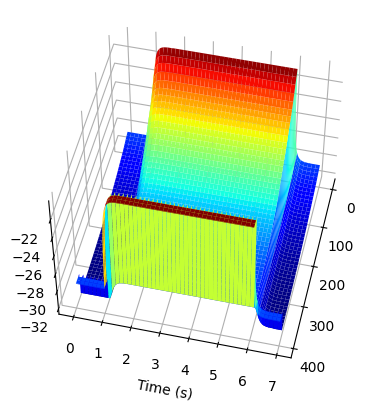

In [10]:
# make_all_comp_simulation_data(electrophysiology_simulation_config["AWAL"], "AWAL", 2)
make_all_comp_simulation_data(electrophysiology_simulation_config["AVAL"], "AVAL", 5)

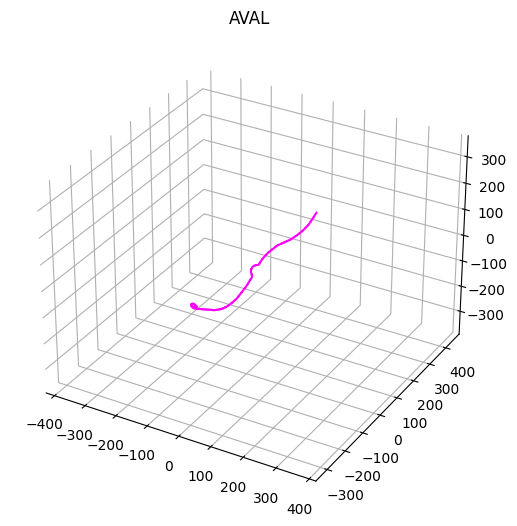

In [9]:
def plot_single_neuron_shape(neuron_name, xticks, yticks, zticks):
    modeldir = os.path.join(this_file_path, '..', 'components', 'model', f'{neuron_name}.hoc').replace("\\", "\/")
    h.load_file(modeldir)
    neuron = getattr(h, neuron_name)()
    ax = h.PlotShape(True).plot(plt)
    ax.set_title(neuron_name)
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_zticks(zticks)
    ax.set_xlim(min(xticks), max(xticks))
    ax.set_ylim(min(yticks), max(yticks))
    ax.set_zlim(min(zticks), max(zticks))
    ax.axis('auto')
    plt.savefig(os.path.join(this_file_path, "single_neuron", "figure", f"{neuron_name}_3d.png"))

neuron_list = ["AIYL", "AVAL", "AWAL", "RIML", "VD05", "AWCL"]
xticks_list = [
    np.arange(-10, 15+1, step=5),
    np.arange(-400, 400+1, step=100),
    np.arange(-40, 40+1, step=5),
    np.arange(-15, 10+1, step=5),
    np.arange(-50, 20+1, step=5),
    np.arange(-40, 40+1, step=5),
]
yticks_list = [
    np.arange(-270, -245+1, step=5),
    np.arange(-300,   500+1, step=100),
    np.arange(-360, -260+1, step=5),
    np.arange(-280, -255+1, step=5),
    np.arange(-130,  -60+1, step=5),
    np.arange(-360, -260+1, step=5),
]
zticks_list = [
    np.arange(30,    50+1, step=5),
    np.arange(-300, 300+1, step=100),
    np.arange(0,     80+1, step=5),
    np.arange(30,    50+1, step=5),
    np.arange(-70,  -10+1, step=5),
    np.arange(0,     80+1, step=5),
]

for x in zip(neuron_list, xticks_list, yticks_list, zticks_list):
    plot_single_neuron_shape(*x)